In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import matplotlib as mpl

def min_max_norm(x):
    x -= x.min()
    x /= x.max()
    
    return x

fig, axes = plt.subplots(1, len(attns), figsize=(10, 10))
if isinstance(axes, mpl.axes._axes.Axes):
    axes = [axes]
for i, (ax, attn) in enumerate(zip(axes, attns)):
    attn = attn[0][600][4]
    
    ax.imshow(attn)
    ax.set_title(f'Stage {i}')
    if i != 0:
        ax.set_axis_off()

plt.subplots_adjust(hspace=0, wspace=0.1)
plt.tight_layout()

NameError: name 'attns' is not defined

In [ ]:
from einops import rearrange

attn = attns[0][0]
attn = rearrange(attn, '(b nh nw) head n m -> b head (nh n) (nw m)', head=8, nh=256//8, nw=256//8)

In [ ]:
attn = min_max_norm(attn[0].mean(0))
plt.imshow(attn)

In [7]:
attns = torch.load('/Data2/ZiHanCao/exps/panformer/visualized_img/lformer_attns/attn_1.pth')


In [8]:
attns[0][0].shape


torch.Size([1, 8, 256, 256])

<AxesSubplot:>

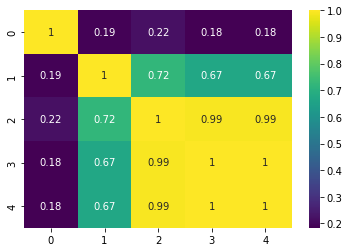

In [9]:
## plot similarity matrix

sim_matrix = torch.zeros(len(attns), len(attns))
for i in range(len(attns)):
    for j in range(len(attns)):
        attn_i = attns[i][0][0].flatten()[None]
        attn_j = attns[j][0][0].flatten()[None]
        
        sim = torch.einsum('b c, b c -> b', attn_i, attn_j) / (torch.norm(attn_i) * torch.norm(attn_j))
        sim_matrix[i, j] = sim
        
import seaborn as sns
sns.heatmap(sim_matrix, cmap='viridis', annot=True)

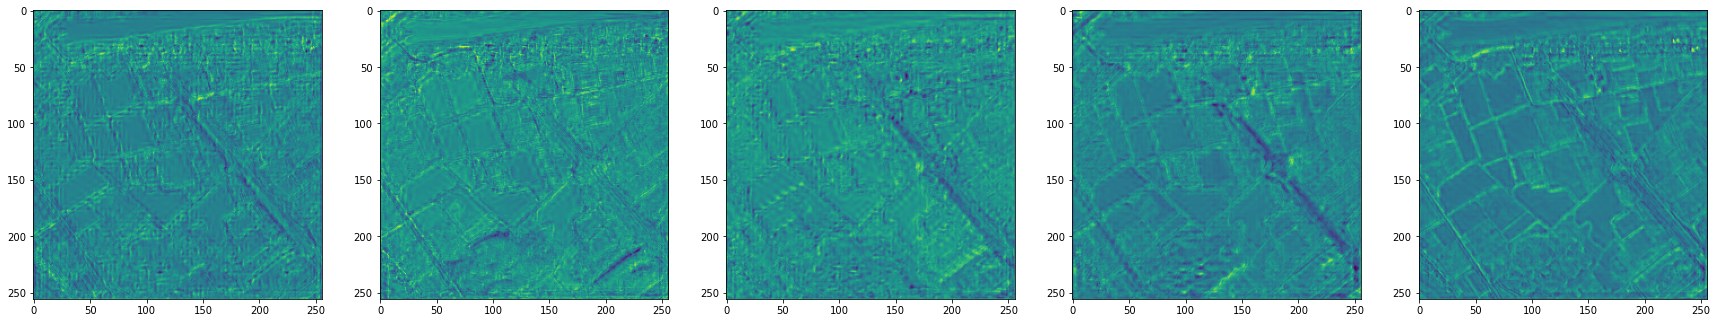

In [15]:
import torch

path = "../visualized_img/lformer_gf2_feats_reduced/feat_4.pth"

lst = torch.load(path)

plt.figure(figsize=(30, 8))

for i in range(len(lst)):
    plt.subplot(1, len(lst), i+1)
    plt.imshow(lst[i][0][0].mean(0))

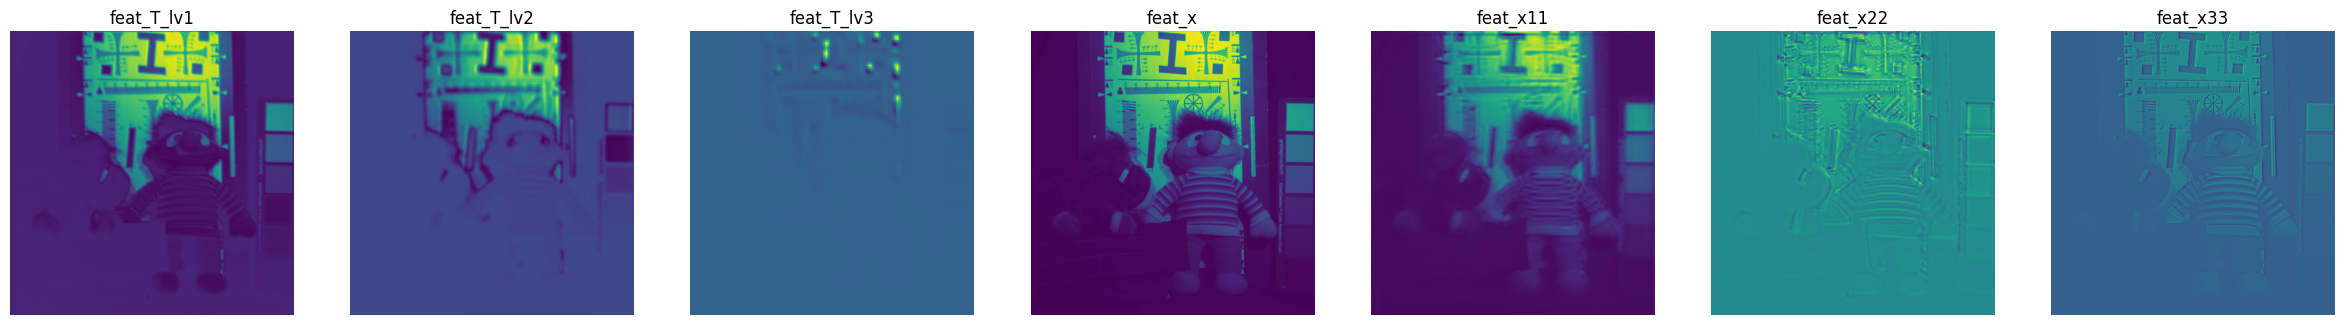

In [23]:
from pathlib import Path
paths = list(Path('/Data3/cao/ZiHanCao/exps/panformer/visualized_img/hypertransformer_feats').glob('*.pt'))
fig, axes = plt.subplots(1, len(paths), figsize=(30, 10))

def min_max_norm(x):
    x -= x.min()
    x /= x.max()
    
    return x

for p, ax in zip(paths, axes):
    feat = torch.load(str(p))
    name = str(p.name).strip('.pt')
    feat = feat[0].mean(0).cpu()
    feat = np.array(min_max_norm(feat))
    ax.imshow(feat)
    ax.set_title(name)
    ax.axis('off')

fig.savefig('/Data3/cao/ZiHanCao/exps/panformer/visualized_img/hypertransformer_feats/feats.png', dpi=300, bbox_inches='tight')
    

In [10]:
feat[0].mean(0).shape

torch.Size([64, 64])